In [1]:
from astropy.table import Table, join, MaskedColumn, vstack, Column
from matplotlib import pyplot as plt

import h5py
import numpy as np
import os
import fnmatch
import pandas as pd
from lightkurve import TessLightCurve
import astropy.units as u


/Users/Tobin/opt/anaconda3/envs/Jim/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/Tobin/.lightkurve/cache. Please move all the files in the legacy directory /Users/Tobin/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
import sys
sys.path.append('/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/post_processing/')
sys.path.append('/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/flair/')
from post import post_process

In [3]:
#post_process('tic21002564', './', './')

/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/flair/lupita.py:27: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/flair/lupita.py:26: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2
/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/flair/lupita.py:25: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/flair/lupita.py:25: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/Tobin/Dropbox/Stellar_Flares_Project/CVZ/flair/flair/jim.py:55: RuntimeWarning: invalid value encountered in log10
  ffd_

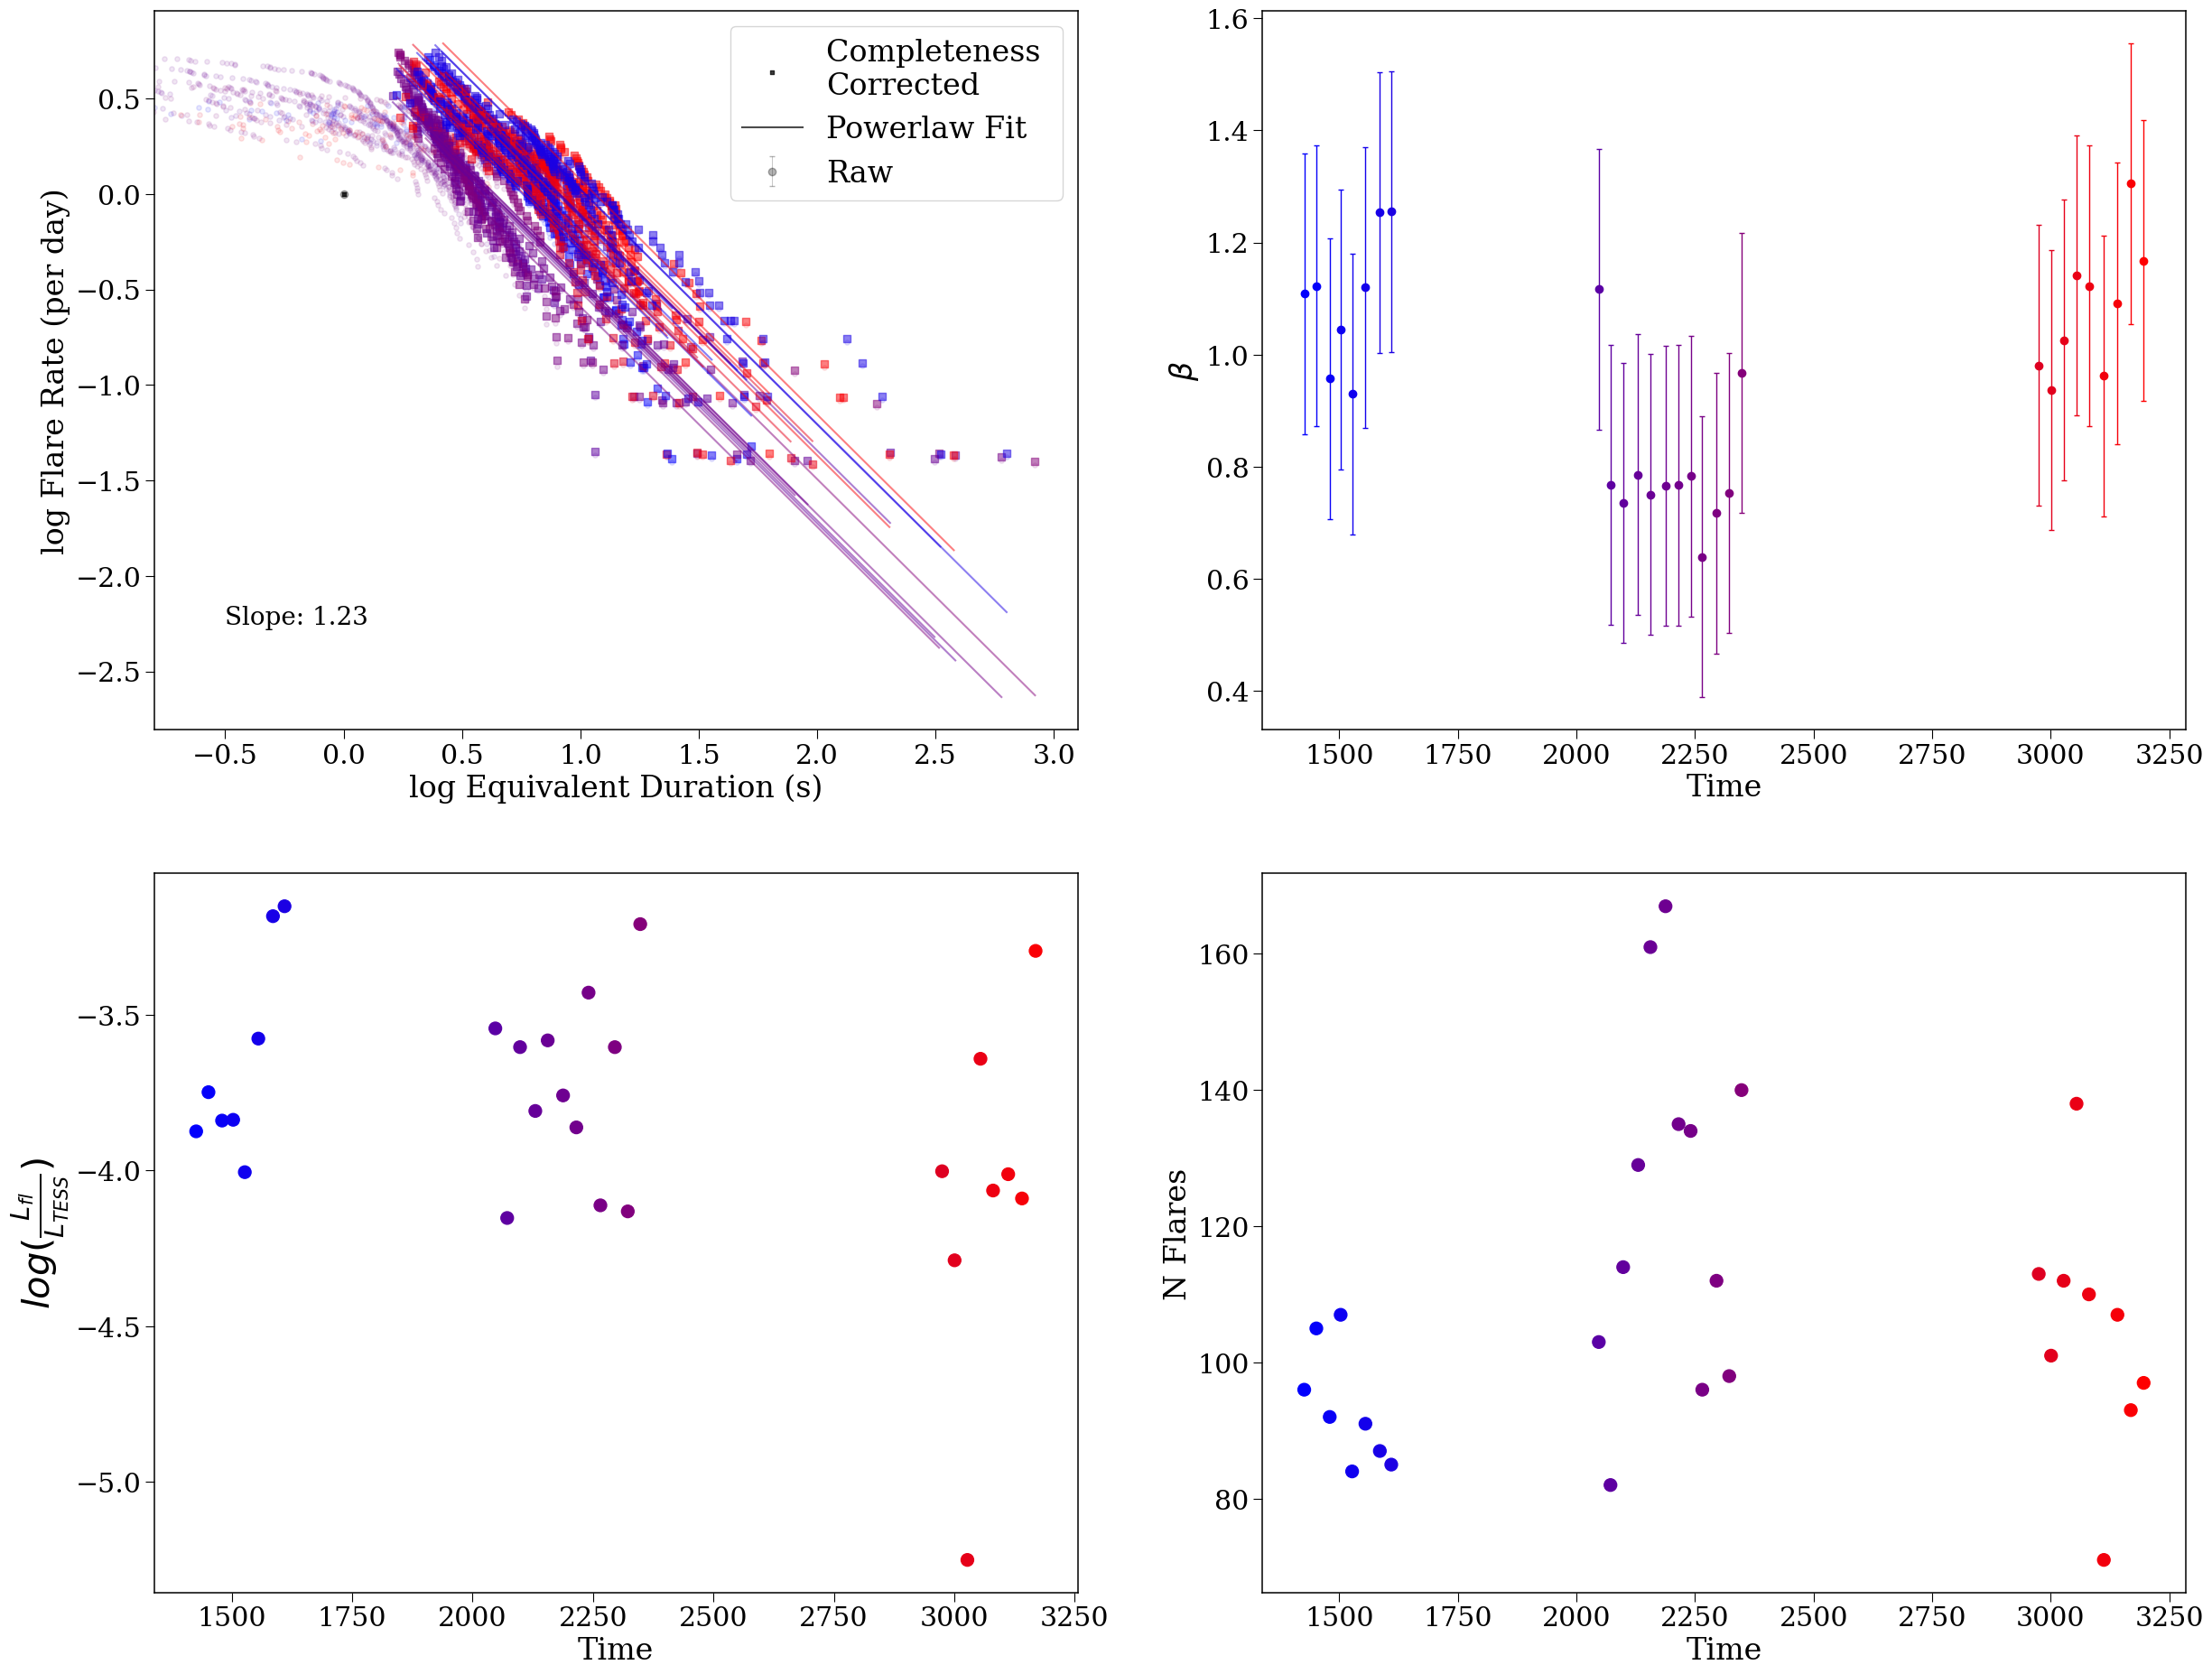

All done with tic142015852! Check out the final output file for the results


In [4]:
post_process('tic142015852', './', './', show=1)

In [5]:
with h5py.File('tic142015852_final_output.h5', 'r') as f:
    print(f.keys())
    print(f['FFD'].keys())
    print(f['lcs'].keys())
    print(f['flares'].keys())
    print(f['metrics'].keys())
    print(Table.read(f['lcs']['sector_0_lc']))

<KeysViewHDF5 ['FFD', 'GP', 'Injection_Recovery', 'flares', 'lcs', 'metrics']>
<KeysViewHDF5 ['FFD_eds', 'corrected_eds', 'corrected_rates', 'full_sample_slope', 'rate_err_above_lim', 'raw_rate_err', 'raw_rates']>
<KeysViewHDF5 ['sector_0_lc', 'sector_10_lc', 'sector_11_lc', 'sector_12_lc', 'sector_13_lc', 'sector_14_lc', 'sector_15_lc', 'sector_16_lc', 'sector_17_lc', 'sector_18_lc', 'sector_19_lc', 'sector_1_lc', 'sector_20_lc', 'sector_21_lc', 'sector_22_lc', 'sector_23_lc', 'sector_24_lc', 'sector_25_lc', 'sector_26_lc', 'sector_27_lc', 'sector_28_lc', 'sector_2_lc', 'sector_3_lc', 'sector_4_lc', 'sector_5_lc', 'sector_6_lc', 'sector_7_lc', 'sector_8_lc', 'sector_9_lc']>
<KeysViewHDF5 ['flare_ends', 'flare_masks', 'flare_starts']>
<KeysViewHDF5 ['F_Flare_F_Bol', 'comp_function_params', 'fifty_percent_completeness_limits', 'sector_beta_values']>
       time           flux    flux_err
------------------ --------- ---------
1410.9020969691376 3973.3623   9.29893
1410.9034858390082 397

In [12]:
with h5py.File('tic142015852_final_output.h5', 'r') as f:
    print(f.keys())
    print(f['flares'].keys())
    print(f['flares']['flare_starts'][...])
    m1=f['flares']['flare_masks'][...][0]

<KeysViewHDF5 ['FFD', 'GP', 'Injection_Recovery', 'flares', 'lcs', 'metrics']>
<KeysViewHDF5 ['flare_ends', 'flare_masks', 'flare_starts']>
[array([  290.,   588.,   786.,   978.,  1053.,  1108.,  1319.,  1363.,
         1403.,  1427.,  1522.,  1548.,  1853.,  1928.,  2037.,  2176.,
         2569.,  2609.,  2644.,  2649.,  2783.,  2848.,  3177.,  3217.,
         3232.,  3605.,  3742.,  4182.,  4187.,  4298.,  4405.,  4444.,
         4900.,  5072.,  5124.,  5457.,  5512.,  5573.,  5744.,  5835.,
         5876.,  6546.,  6607.,  6684.,  6746.,  6810.,  6855.,  6924.,
         6980.,  7148.,  7505.,  7939.,  8064.,  8113.,  8129.,  8220.,
         8410.,  8782.,  8907.,  9027.,  9090.,  9354.,  9683.,  9839.,
        10155., 10207., 10346., 10392., 10521., 10765., 10924., 10966.,
        11012., 11206., 11263., 11361., 11491., 11564., 11781., 11885.,
        12051., 12117., 12127., 12342., 12473., 12525., 12638., 12697.,
        12719., 12755., 12781., 13283., 13660., 14036., 14169., 1424

In [7]:
#Try and combine the output files, and eliminate the repetative stuff

with h5py.File('tic142015852_final_output.h5', 'r') as f:
    print(f.keys())
    print(f['GP'].keys())
    print(f['Injection_Recovery'].keys())

<KeysViewHDF5 ['FFD', 'GP', 'Injection_Recovery', 'flares', 'lcs', 'metrics']>
<KeysViewHDF5 ['sector_0', 'sector_1', 'sector_10', 'sector_11', 'sector_12', 'sector_13', 'sector_14', 'sector_15', 'sector_16', 'sector_17', 'sector_18', 'sector_19', 'sector_2', 'sector_20', 'sector_21', 'sector_22', 'sector_23', 'sector_24', 'sector_25', 'sector_26', 'sector_27', 'sector_28', 'sector_3', 'sector_4', 'sector_5', 'sector_6', 'sector_7', 'sector_8', 'sector_9']>
<KeysViewHDF5 ['sector_0', 'sector_1', 'sector_10', 'sector_11', 'sector_12', 'sector_13', 'sector_14', 'sector_15', 'sector_16', 'sector_17', 'sector_18', 'sector_19', 'sector_2', 'sector_20', 'sector_21', 'sector_22', 'sector_23', 'sector_24', 'sector_25', 'sector_26', 'sector_27', 'sector_28', 'sector_3', 'sector_4', 'sector_5', 'sector_6', 'sector_7', 'sector_8', 'sector_9']>


In [8]:
with h5py.File('tic142015852_final_output.h5', 'r') as f:
    print(f.keys())
    print(f['GP']['sector_0']['GP'].keys())

<KeysViewHDF5 ['FFD', 'GP', 'Injection_Recovery', 'flares', 'lcs', 'metrics']>
<KeysViewHDF5 ['mu', 'variance']>


In [9]:
with h5py.File('tic142015852_final_output.h5', 'r') as f:
    print(f.keys())
    print(f['Injection_Recovery']['sector_0'].keys())

<KeysViewHDF5 ['FFD', 'GP', 'Injection_Recovery', 'flares', 'lcs', 'metrics']>
<KeysViewHDF5 ['injected_amps', 'injected_eds', 'recovered']>


In [10]:
with h5py.File('tic142015852_final_output.h5', 'r') as f:
    print(f.keys())
    print(f['FFD'].keys())
    print(f['FFD']['FFD_eds'][:])

<KeysViewHDF5 ['FFD', 'GP', 'Injection_Recovery', 'flares', 'lcs', 'metrics']>
<KeysViewHDF5 ['FFD_eds', 'corrected_eds', 'corrected_rates', 'full_sample_slope', 'rate_err_above_lim', 'raw_rate_err', 'raw_rates']>
[array([ 1.38772889,  1.28466809,  1.26031039,  1.25483992,  1.19866528,
         1.14821367,  1.09542615,  0.99293326,  0.96947148,  0.95503229,
         0.95050628,  0.93076455,  0.91575876,  0.88989445,  0.87023551,
         0.86796236,  0.86451108,  0.8499697 ,  0.84904295,  0.84276809,
         0.83832047,  0.82468612,  0.81048072,  0.81036985,  0.80748909,
         0.77899559,  0.77569994,  0.75512885,  0.75347746,  0.74057779,
         0.73210787,  0.72582414,  0.72181485,  0.71920768,  0.70839244,
         0.69918788,  0.68214282,  0.68114276,  0.66852016,  0.64880948,
         0.64170854,  0.63976151,  0.61353197,  0.59124283,  0.57770573,
         0.56624668,  0.55432998,  0.53214235,  0.52896084,  0.51233523,
         0.51109122,  0.50444964,  0.49619467,  0.493959